In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(22)

from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/S1 CS UGM/Pembelajaran Mesin/Tugas 3/iris-2-target.csv'

df = pd.read_csv(path)
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Selesai.
Selesai.


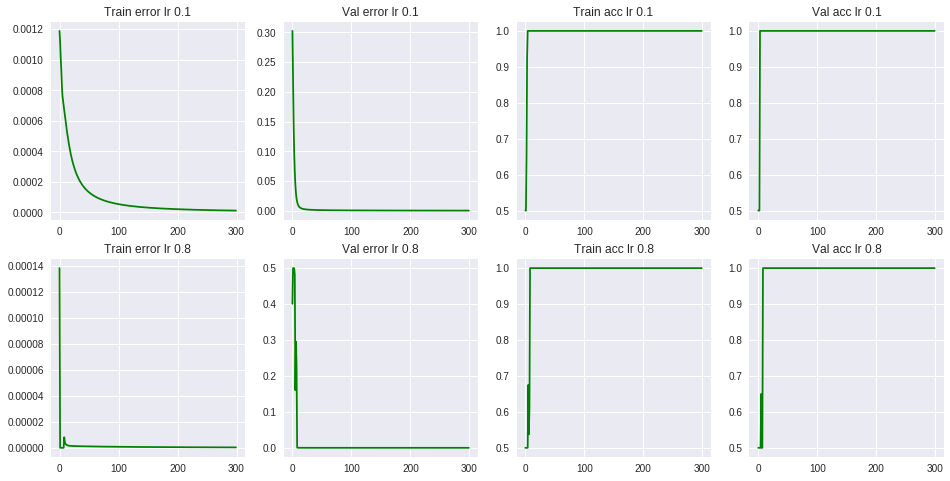

In [25]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def train(X, y, epoch, learning_rate = 0.01):
  theta = np.random.random((4, ))
  bias = np.array(1)  
  
  train_loss = []
  train_acc = []
  val_loss = []
  val_acc = []
  
  # bagi data menjadi data train dan validasi
  X_val = pd.concat([X.loc[:9, :], X.loc[90:]], axis = 0).values
  y_val = pd.concat([y[:10], y[90:]], axis = 0).values
  X_train = X.loc[10:89, :].values
  y_train = y[10:90].values
  
  for e in range(epoch):
    # train
    for i in range(len(X_train)):
      # hitung
      target = y_train[i]
      x = X_train[i, :]
      pred = np.dot(x, theta) + bias
      pred = sigmoid(pred)
      
      err = (target - pred) ** 2
      
      # update
      dtheta = 2 * (pred - target) * pred * (1 - pred) * x
      dbias = 2 * (pred - target) * pred * (1 - pred)
      theta = theta - learning_rate * dtheta
      bias = bias - learning_rate * dbias
    
    # cata performa
    test_result = np.dot(X_val, theta) + bias
    test_result = sigmoid(test_result)
    val_loss.append(((y_val - test_result)**2).mean())
    test_result = np.where(test_result >= 0.5, 1, 0)
    val_accuracy = (test_result == y_val).sum() / len(test_result)
    val_acc.append(val_accuracy)
    
    train_result = np.dot(X_train, theta) + bias
    train_result = sigmoid(train_result)
    train_loss.append(err)
    train_result = np.where(train_result >= 0.5, 1, 0)
    train_accuracy = (train_result == y_train).sum() / len(train_result)
    train_acc.append(train_accuracy)

  print("Selesai.")
  return (theta, bias, train_loss, val_loss, train_acc, val_acc)

# Jalankan fungsinya
X = df.iloc[:, :4]
y = df.iloc[:, 4]
theta1, bias1, train_loss1, val_loss1, train_acc1, val_acc1 = train(X, y, epoch=300, learning_rate=0.1)
theta8, bias8, train_loss8, val_loss8, train_acc8, val_acc8 = train(X, y, epoch=300, learning_rate=0.8)

# Membuat Grafik
plt.figure(figsize=(16, 8))

plt.subplot(241)
plt.plot(train_loss1, color='green')
plt.title('Train error lr 0.1')

plt.subplot(242)
plt.plot(val_loss1, color='green')
plt.title('Val error lr 0.1')

plt.subplot(243)
plt.plot(train_acc1, color='green')
plt.title('Train acc lr 0.1')

plt.subplot(244)
plt.plot(val_acc1, color='green')
plt.title('Val acc lr 0.1')

plt.subplot(245)
plt.plot(train_loss8, color='green')
plt.title('Train error lr 0.8')

plt.subplot(246)
plt.plot(val_loss8,color='green')
plt.title('Val error lr 0.8')

plt.subplot(247)
plt.plot(train_acc8, color='green')
plt.title('Train acc lr 0.8')

plt.subplot(248)
plt.plot(val_acc8, color='green')
plt.title('Val acc lr 0.8')

plt.show()